# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# 1. Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

## Hough transform

In [35]:
img = cv.imread('coins_1.jfif')

#grayscale
blur = cv.GaussianBlur(img, (5,5), 2)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

#Hough circle transform
row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1=150, param2=25)

#draw the circles
circles = np.uint8(np.around(circles))
for i in circles[0]:
    #draw both center and circles itself
    center = (i[0], i[1])
    cv.circle(img, center, 1, (100, 200, 0), 3)
    #radius
    radius = i[2]
    cv.circle(img, center, radius, (0, 100, 255), 2)

cv.imshow('coins', img)
cv.waitKey(0)

-1

## Blob detection

In [34]:
img = cv.imread('coins_1.jfif')
blur = cv.medianBlur(img, 5)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

#parameter settings
params = cv.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 125
params.thresholdStep = 10
params.filterByColor = True
params.blobColor = 255
params.filterByConvexity = False
params.filterByInertia = False

#detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

#draw the keypoints
im_with_keypoints = cv.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow("blobs", im_with_keypoints)
cv.waitKey(0)


-1

## Comment

Both methods can detect the coins easily. Both need tuning of different parameters.

# 2. Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
    - You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
    - Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

<function matplotlib.pyplot.show(close=None, block=None)>

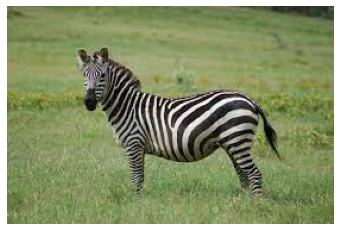

In [38]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_rgb)
plt.axis("off")
plt.show

## Elbow method to find optimal k

In [54]:
#reshape image
img_reshape = img_rgb.reshape((-1,3))
#img_reshape = img_rgb.reshape((img_rgb.shape[0]*img_rgb.shape[1], 3))
img_reshape = np.float32(img_reshape)
K = range(2,11)
wcss = []

for k in K:
    #k-means clustering
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts = 10
    compactness, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)
    wcss.append(compactness)


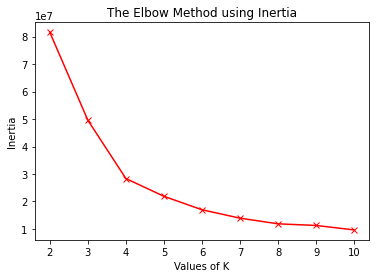

In [60]:
plt.plot(K, wcss, 'rx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Comment

Since the "elbow" of the graph is at k=4, therefore, optimal K = 4.

## BGR Clustering

In [78]:
#reshape image
img_reshape = img.reshape((-1,3))
img_reshape = np.float32(img_reshape)

#k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

#center
center = np.uint8(center)
#
res = center[label.ravel()]
res_bgr = res.reshape((img.shape))
res_bgr = cv.cvtColor(res_bgr, cv.COLOR_BGR2RGB)

## HSV Clustering

In [79]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#reshape image
img_reshape = img_hsv.reshape((-1,3))
img_reshape = np.float32(img_reshape)

#k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

#center
center = np.uint8(center)
#
res = center[label.ravel()]
res_hsv = res.reshape((img_hsv.shape))
res_hsv = cv.cvtColor(res_hsv, cv.COLOR_HSV2RGB)

## Compare Results

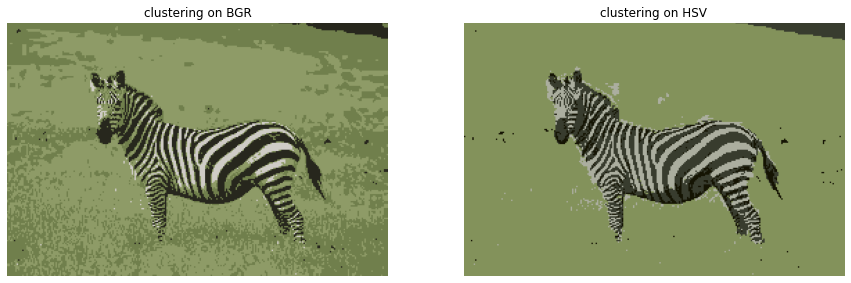

In [80]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(res_bgr)
plt.title('clustering on BGR'),plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(res_hsv)
plt.title('clustering on HSV'),plt.axis('off')
plt.show()

## Comment

The results of clustering on HSV color space is significantly better than using BGR color space. The zebra can be accurately clustered.